## Phishing site classification

In this notebook a  ML model is being built in order to rightfully identify and classify Phishing websites

#### Data source (OpenML.org)
University of Dubai","fadi '@' cud.ac.ae) **Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/phishing 

In [4]:
# Setup
# display full output in Jupyter, not only last result 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [226]:
## Loading needful libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory data analysis

Importing the data and ploting all the form of the dataset to allow analysis to perform

In [7]:
phi_data = pd.read_csv("phishing.csv", sep=",")

In [8]:
phi_data.ndim

2

In [9]:
phi_data.shape

(11055, 31)

This dataset has 31 features for 11055 observations. 

In [10]:
columns = phi_data.columns

In [11]:
print(columns)

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [12]:
phi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [13]:
phi_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
phi_data.head(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1


In [15]:
phi_data.apply(lambda x: x.value_counts())

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
-1,3793.0,8960,1444.0,1655.0,1429.0,9590.0,3363,3557,7389.0,2053.0,...,2137.0,1012.0,5189.0,3443.0,2655,8201.0,1539.0,548,1550.0,4898.0
0,NaN,135,NaN,NaN,NaN,NaN,3622,1167,NaN,NaN,...,NaN,NaN,NaN,NaN,2569,NaN,NaN,6156,NaN,NaN
1,7262.0,1960,9611.0,9400.0,9626.0,1465.0,4070,6331,3666.0,9002.0,...,8918.0,10043.0,5866.0,7612.0,5831,2854.0,9516.0,4351,9505.0,6157.0


The NaN values in the above output simply indicate that the variables with NaN do not have 0 but only have -1 or 1 as output.  
The below confirms it by counting the number of null values

In [16]:
phi_data.apply(lambda x: x.isnull().sum())

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## Preprocessing the data and transformation

Preprocessing the data by creating additional features, dealing with missing values. 

Given the above, the dataset is already featurized and that all the features are actually categorical even though they appear to be integers. The transformation into integers is necessary nevertheless.

In [17]:
phi_data_tfx = phi_data.astype('category')

In [18]:
phi_data_tfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null category
URL_Length                     11055 non-null category
Shortining_Service             11055 non-null category
having_At_Symbol               11055 non-null category
double_slash_redirecting       11055 non-null category
Prefix_Suffix                  11055 non-null category
having_Sub_Domain              11055 non-null category
SSLfinal_State                 11055 non-null category
Domain_registeration_length    11055 non-null category
Favicon                        11055 non-null category
port                           11055 non-null category
HTTPS_token                    11055 non-null category
Request_URL                    11055 non-null category
URL_of_Anchor                  11055 non-null category
Links_in_tags                  11055 non-null category
SFH                            11055 non-null category
Submitting_

Creating Training and Test set from the transformed dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
phi_X = phi_data_tfx.drop('Result', axis=1)

In [21]:
phi_Y = phi_data_tfx['Result']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(phi_X, phi_Y, test_size=0.25, random_state=1234, stratify=phi_Y)

In [23]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(8291, 30)

(8291,)

(2764, 30)

(2764,)

## Selecting the ML algorithm

In [25]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1. Linear SVC

In [26]:
model_svm = svm.LinearSVC(C=1.0)

In [27]:
model_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [28]:
phi_svc_pred = model_svm.predict(X_test)

In [29]:
svm_score = model_svm.score(X_test, y_test)
print(svm_score)

0.9265557163531114


#### 1.1 Cross-validation and verify the performance.

In [80]:
svm_cv = pd.Series(cross_val_score(model_svm, phi_data_tfx.drop('Result', axis=1), phi_data_tfx.Result, cv=5))

In [31]:
print(svm_cv)

0    0.924051
1    0.928119
2    0.928991
3    0.918100
4    0.920362
dtype: float64


Cross validation shows that all results are around the performance of model 

#### <item> 2. KNeighbors

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
knn_score = model_knn.score(X_test, y_test)
print(knn_score)

0.9395803183791607


In [79]:
#### Cross validation

knn_cv = pd.Series(cross_val_score(model_knn, X=phi_data_tfx.drop('Result', axis=1), y=phi_data_tfx.Result, cv=5))

In [35]:
print(knn_cv)

0    0.963382
1    0.961573
2    0.957485
3    0.930317
4    0.908597
dtype: float64


The cross-validation here produces higher performance for folds and lower up to 90% for some others.  
This model works but is more unstable and output is less predictable.

<item> <strong>3. Ensemble classifiers - Random Forest</strong>

In [36]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier

In [37]:
model_rf = RandomForestClassifier(n_estimators=100)

In [38]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = model_rf.predict(X_test)

In [40]:
rf_score = model_rf.score(X_test, y_test)
print(rf_score)

0.9710564399421129


Random Forest shows the highest performance so far. Cross validation is also run.

In [78]:
rf_cv = pd.Series(cross_val_score(model_rf, X=phi_data_tfx.drop('Result', axis=1), y=phi_data_tfx.Result, cv=5))

In [42]:
print(rf_cv)

0    0.982821
1    0.979204
2    0.977386
3    0.962443
4    0.940724
dtype: float64


Result of cross validation shows that Random Forest has the highest performance at its max even though its predictions can vary of about 3 decimal points.

Check what features are deemed important by RandomForest.

In [43]:
features_imp = pd.Series(model_rf.feature_importances_,index=X_test.columns.tolist()).sort_values(ascending=False)

In [44]:
features_imp

SSLfinal_State                 0.303488
URL_of_Anchor                  0.245934
web_traffic                    0.078496
having_Sub_Domain              0.069245
Links_in_tags                  0.044082
Prefix_Suffix                  0.043327
Request_URL                    0.020846
SFH                            0.020072
Links_pointing_to_page         0.019212
Domain_registeration_length    0.018181
age_of_domain                  0.016389
having_IP_Address              0.014197
Google_Index                   0.013877
DNSRecord                      0.012999
Page_Rank                      0.011804
URL_Length                     0.008378
HTTPS_token                    0.006522
Shortining_Service             0.005782
Redirect                       0.005749
Submitting_to_email            0.005415
having_At_Symbol               0.005170
Statistical_report             0.004793
Favicon                        0.004653
popUpWidnow                    0.004526
Abnormal_URL                   0.004113


In [45]:
### If we consider that only features of an importance of 0.05 will be considered, we get the below selection
features_imp[features_imp[:]>=0.05]

SSLfinal_State       0.303488
URL_of_Anchor        0.245934
web_traffic          0.078496
having_Sub_Domain    0.069245
dtype: float64

<strong>Plotting the top 10 important features from Random Forest Perspective</strong>

Text(0.5, 0, 'Feature importance score')

Text(0, 0.5, 'Top 10 Features')

Text(0.5, 1.0, 'Visualizing Random Forest important features')

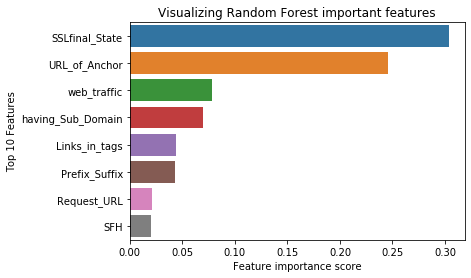

In [46]:
sns.barplot(x=features_imp[features_imp[:]>=0.02], y=features_imp[features_imp[:]>=0.02].index)
plt.xlabel("Feature importance score")
plt.ylabel("Top 10 Features")
plt.title("Visualizing Random Forest important features")
plt.show()

#### 4. Ensemble classifiers - Bagging

In [47]:
model_bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, random_state=8)

In [49]:
model_bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [50]:
y_pred_bg = model_bg.predict(X_test)

In [51]:
model_bg.score(X_test, y_test)

0.9703328509406657

In [77]:
bg_cv = pd.Series(cross_val_score(model_bg, X=phi_data_tfx.drop('Result', axis=1), y=phi_data_tfx.Result, cv=5))

In [53]:
print(bg_cv)

0    0.981465
1    0.978752
2    0.974672
3    0.953846
4    0.928959
dtype: float64


## Conclusion

In [276]:
model_compare = pd.concat([svm_cv, knn_cv, rf_cv, bg_cv], axis=1)

In [277]:
model_compare["index"] = list(model_compare.index)
model_compare.columns=(["Svm", "Knn", "RandomForest", "Bagging", "index"])

In [278]:
model_compare

,Svm,Knn,RandomForest,Bagging,index
0,0.924051,0.963382,0.982821,0.981465,0
1,0.928119,0.961573,0.979204,0.978752,1
2,0.928991,0.957485,0.978290,0.974672,2
3,0.918100,0.930317,0.961991,0.953846,3
4,0.920362,0.908597,0.942081,0.928959,4


#### Description of the dataset

In [282]:
model_compare.drop("index", axis=1).describe()

,Svm,Knn,RandomForest,Bagging
count,5.000000,5.000000,5.000000,5.000000
mean,0.923925,0.944271,0.968878,0.963539
std,0.004741,0.024013,0.016994,0.022172
min,0.918100,0.908597,0.942081,0.928959
25%,0.920362,0.930317,0.961991,0.953846
50%,0.924051,0.957485,0.978290,0.974672
75%,0.928119,0.961573,0.979204,0.978752
max,0.928991,0.963382,0.982821,0.981465


Text(0.5, 1.0, 'Prediction Performance plot by Algorythm')

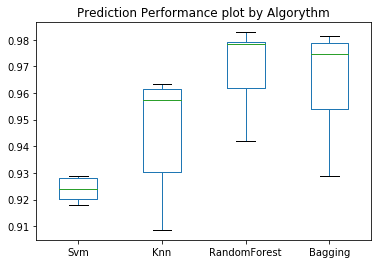

In [330]:
model_compare.drop("index", axis=1).plot.box()
plt.title("Prediction Performance plot by Algorythm")
plt.show()

Above plot shows that:  
<item> 1. Random Forest has the best prediction score and is the second most stable.  
<item> 2. SVM in general is the least performing but the most consistent (lowest variance around the mean)  
<item> 3. Bagging is the second best prectiction score in general but with a high prediction score variance  
<item> 4. KNearestNeighbor is third performance in prediction but it prediction is highly variable.  
<item> 5. In general, ensemble algorithm perform better than other for this classification problem

### Tuning Random Forest to get the best performance

0.9677962101019744

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Text(0, 0.5, 'AUC score')

Text(0.5, 0, 'n_estimators')

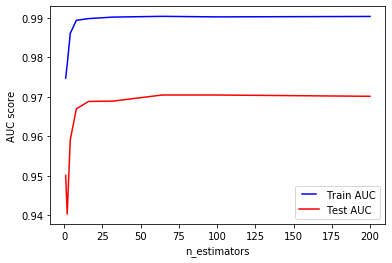

In [341]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)   
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

The best performance is obtained somewhere between 32 and 64 trees. Beyond that, increasing the trees decreases the performance or does not improve it. 
The model is being rebuild using 32 trees for parsimony and get the best prediction.

In [342]:
final_model = RandomForestClassifier(n_estimators=32)

In [343]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [344]:
y_pred_final = final_model.predict(X_test)

In [355]:
print("Random Forest with tree depth 32 score is %8.2f" % final_model.score(X_test, y_test))

Random Forest with tree depth 32 score is     0.97


### With an accuracy of 97% the classifier can be applied reliably on sites of the dataset and this performance can further be improved by fine tuning the model or by using model combination technics also known as boosting.